In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Scikit-learn nos ofrece una variedad ampliada de modelos Naive Bayes, para este problema
# usamos MultinomialNB que es pensado para este tipo de problemas
from sklearn.naive_bayes import MultinomialNB   

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score

# TP3: Detector de SPAM

Uno de los problemas más comunes en la clasificación es la detección de correos electrónicos SPAM. Uno de los primeros modelos utilizados para abordar este problema fue el clasificador de Bayes ingenuo. La detección de SPAM es un problema persistente en el mundo digital, ya que los spammers continúan adaptando sus estrategias para eludir los filtros de correo no deseado. Además del clasificador de Bayes ingenuo, se han desarrollado y utilizado una variedad de técnicas más avanzadas en la detección de SPAM, que incluyen algoritmos de aprendizaje automático, redes neuronales y métodos basados en reglas.

En este trabajo práctico, utilizaremos un conjunto de datos que consta de 4601 observaciones de correos electrónicos, de los cuales 2788 son correos legítimos y 1813 son correos SPAM. Dado que el contenido de los correos electrónicos es un tipo de dato no estructurado, es necesario procesarlo de alguna manera. Para este conjunto de datos, ya se ha aplicado un procesamiento típico en el Procesamiento del Lenguaje Natural (NLP), que consiste en contar la frecuencia de palabras observadas en los correos.

El procesamiento de lenguaje natural (NLP) desempeña un papel fundamental en la detección de SPAM, ya que permite analizar el contenido de los correos electrónicos y extraer características relevantes para la clasificación. Además de contar la frecuencia de palabras, se pueden utilizar técnicas más sofisticadas, como la extracción de características semánticas y el análisis de sentimientos, para mejorar la precisión de los modelos de detección de SPAM.

En este proceso, se cuenta la cantidad de ocurrencias de cada palabra en los diferentes correos.

![spam counter](./spam.png)

Con el fin de preservar la privacidad de los mensajes, la frecuencia de palabras se encuentra normalizada. El conjunto de datos está compuesto por 54 columnas de atributos que se denominan:

- `word_freq_XXXX`: Donde `XXXX` es la palabra o símbolo. Los valores son enteros que van de 0 a 20k.

Además, hay una columna adicional llamada `spam`, que es 1 si el correo es SPAM o 0 si no lo es.

Los clasificadores de Bayes ingenuos fueron los primeros filtros utilizados por las aplicaciones de correo electrónico, basados en este principio de palabras. La idea es que, partiendo de un dato a priori sobre la probabilidad de que un correo sea SPAM o no, ciertas palabras nos indicarán que la probabilidad a posteriori, dadas esas palabras, es más probable que el correo sea SPAM o no.

In [159]:
dataset = pd.read_csv("dataset/spambase.csv", header=None) # cargando los datos desde un CSV
dataset.head(10)
column_names = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our",
    "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
    "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses",
    "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
    "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
    "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
    "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
    "word_freq_edu", "word_freq_table", "word_freq_conference",  # Estas son las primeras 48 (0-47)
    "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#",  # (48-53)
    "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", # (54-56)
    "spam" # (57)
]

dataset.columns = column_names

print(dataset.head(10))

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   
5            0.00               0.00           0.00           0.0   
6            0.00               0.00           0.00           0.0   
7            0.00               0.00           0.00           0.0   
8            0.15               0.00           0.46           0.0   
9            0.06               0.12           0.77           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23  

In [160]:
print(dataset.columns)



Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


Para obtener las palábras más usadas podemos hacer un `groupby`:

In [161]:
column_sum = dataset.groupby(by="spam", as_index=False).sum()
print(column_sum)

   spam  word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0     0          204.86             681.57         559.22          2.47   
1     1          276.19             298.51         732.08        298.55   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0         504.74          124.19             26.16              107.10   
1         931.80          317.05            499.31              377.36   

   word_freq_order  ...  word_freq_conference  char_freq_;  char_freq_(  \
0           106.08  ...                142.82      140.183      442.116   
1           308.32  ...                  3.81       37.299      197.563   

   char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0       63.242      306.634       32.476       60.536   
1       14.864      931.361      316.329      143.004   

   capital_run_length_average  capital_run_length_longest  \
0                    6627.915                       50782   
1                   17258.246  

Y despues se pueden combinar las columnas en usando [pd.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

In [162]:
# Obtenemos los atributos y target
X = (dataset.drop(columns="spam") * 100).astype(int)
print (X)
#X = dataset2.drop(columns="spam")
y = dataset["spam"]
#print (y)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0                  0                 64             64             0   
1                 21                 28             50             0   
2                  6                  0             71             0   
3                  0                  0              0             0   
4                  0                  0              0             0   
...              ...                ...            ...           ...   
4596              31                  0             62             0   
4597               0                  0              0             0   
4598              30                  0             30             0   
4599              96                  0              0             0   
4600               0                  0             65             0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0                32               0                 0     

### las top 10 palabras en spam:

In [163]:
# Filtramos la fila de spam=1 y quitamos la columna 'spam'
spam_sum = column_sum[column_sum["spam"] == 1].drop(columns="spam")
#print(spam_sum)

# Trasponemos para tener las columnas como filas y poder ordenar
spam_sum_t = spam_sum.T
#print(spam_sum_t)
top10_spam_words = spam_sum_t.iloc[:, 0].sort_values(ascending=False).head(10)
print("Top 10 palabras en SPAM:")
print(top10_spam_words)
"""
# Ordenamos por el valor de la frecuencia total
top10_spam_words = spam_sum_t[0].sort_values(ascending=False).head(10)

"""

Top 10 palabras en SPAM:
capital_run_length_total      853233.000
capital_run_length_longest    189265.000
capital_run_length_average     17258.246
word_freq_you                   4105.610
word_freq_your                  2502.610
word_freq_will                   997.100
word_freq_free                   939.790
word_freq_our                    931.800
char_freq_!                      931.361
word_freq_all                    732.080
Name: 1, dtype: float64


'\n# Ordenamos por el valor de la frecuencia total\ntop10_spam_words = spam_sum_t[0].sort_values(ascending=False).head(10)\n\n'

### las top 10 palabras en spam

In [164]:
nonspam_sum = column_sum[column_sum["spam"] == 0].drop(columns="spam")
nonspam_sum_t = nonspam_sum.T
top10_nonspam_words = nonspam_sum_t[0].sort_values(ascending=False).head(10)
print("Top 10 palabras en NO SPAM:")
print(top10_nonspam_words)


Top 10 palabras en NO SPAM:
capital_run_length_total      450181.000
capital_run_length_longest     50782.000
capital_run_length_average      6627.915
word_freq_you                   3541.710
word_freq_george                3527.560
word_freq_hp                    2496.580
word_freq_will                  1495.270
word_freq_your                  1223.100
word_freq_hpl                   1204.400
word_freq_re                    1159.140
Name: 0, dtype: float64


## Conclusión

### Análisis de las 10 palabras más frecuentes en SPAM y NO SPAM

#### 1. **Presencia destacada de características relacionadas con el uso de mayúsculas (`capital_run_length_*`):**
- Las variables `capital_run_length_total`, `capital_run_length_longest` y `capital_run_length_average` aparecen en el **top 10** de ambas clases (SPAM y NO SPAM).
- Esto sugiere que la **distribución y magnitud de caracteres en mayúsculas** es relevante en el conjunto de datos, independientemente de si el correo es SPAM o NO SPAM.
- Sin embargo, por sí solas estas características no son suficientes para diferenciar claramente entre SPAM y NO SPAM.

#### 2. **Palabras comunes en ambas categorías:**
- Palabras como **"you"** y **"your"** aparecen en el **top 10** de ambas clases.
- Esto indica que ciertos términos son de **uso generalizado** en correos electrónicos, tanto legítimos como no legítimos.
- La mera presencia de estas palabras no permite diferenciar claramente entre SPAM y NO SPAM.

#### 3. **Palabras más asociadas a SPAM:**
- En la lista de SPAM destacan términos como **"free"** y un alto uso del carácter **`!`** (`char_freq_!`).
- Esto refleja que los correos SPAM suelen contener **ofertas gratuitas** o frases llamativas que utilizan signos de exclamación.

#### 4. **Palabras más asociadas a NO SPAM:**
- En la lista de NO SPAM aparecen términos como **"george"**, **"hp"**, y **"hpl"**.
- Estas palabras sugieren **contextos personales, técnicos o laborales**, propios de correos legítimos y menos frecuentes en correos SPAM.

#### 5. **Conclusión global:**
- Las métricas relacionadas con **mayúsculas** son fuertes en ambos casos, pero no son completamente discriminantes.
- Palabras comunes como **"you"** y **"your"** no son útiles como atributos por sí solas.
- Palabras como **"free"** y el uso del carácter **`!`** son indicativos más fuertes de SPAM.
- Los correos NO SPAM tienden a incluir términos **contextuales o personales** como nombres propios o términos técnicos.

En definitiva, la detección de SPAM no se basa únicamente en la presencia de una o dos palabras, sino en **patrones combinados** que incluyen vocabulario específico, uso de puntuación y otras métricas relacionadas con el texto.



# Punto 2
Se separa el dataset en entrenamiento y evaluación

In [165]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3)
print("X_train:")
print(X_train)
print("y_train:")
print(y_train)

print("X_test:")
print(X_test)
print("y_test:")
print(y_test)

X_train:
      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
4480               0                  0              0             0   
206                0                  0             55             0   
2749               0                  0              0             0   
1444              60                  0             36             0   
867                0                  0              0             0   
...              ...                ...            ...           ...   
2163               0                  0              0             0   
1031               0                  0             32             0   
2656               0                  0              0             0   
4006               0                  0              0             0   
3089             100                  0            100             0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
4480              0               0              

# Punto 3

In [166]:
# Creamos el clasificador
nb_clf = MultinomialNB()

# Entrenamos el modelo con los datos de entrenamiento
nb_clf.fit(X_train, y_train)


MultinomialNB()

Luego de las lienas anteriores el modelo aprendió qué palabras son más comunes en SPAM y cuáles en NO SPAM.
Ha calculado las probabilidades necesarias para, cuando vea un nuevo correo (por ejemplo, uno en X_test), predecir si es SPAM o NO SPAM.

In [167]:
# Imprimir las clases que el modelo diferencia
print("Clases del modelo:", nb_clf.classes_)

Clases del modelo: [0 1]


In [168]:
# Cantidad de instancias de entrenamiento que corresponden a cada clase
print("Conteo de ejemplos por clase:", nb_clf.class_count_)

Conteo de ejemplos por clase: [1944. 1276.]


In [169]:
# Suma de frecuencias de cada característica (palabra) en cada clase
# Esta matriz tiene dimensiones [n_clases, n_features]
# Muestra cuántas veces aparece cada palabra en la clase spam y en la clase no spam (tras el smoothing aplicado)
print("Conteo de características por clase (feature_count_):")
print(nb_clf.feature_count_)

Conteo de características por clase (feature_count_):
[[1.262300e+04 4.780500e+04 3.965200e+04 1.360000e+02 3.511300e+04
  8.772000e+03 2.023000e+03 7.409000e+03 7.188000e+03 3.265900e+04
  3.807000e+03 1.031650e+05 1.282700e+04 7.901000e+03 1.336000e+03
  1.632700e+04 1.041900e+04 1.888100e+04 2.409070e+05 1.425000e+03
  8.088900e+04 5.546000e+03 1.293000e+03 3.605000e+03 1.754810e+05
  8.898200e+04 2.505450e+05 3.887500e+04 3.366900e+04 3.146500e+04
  2.057500e+04 1.570500e+04 2.997700e+04 1.579900e+04 3.429500e+04
  2.659200e+04 3.805300e+04 3.925000e+03 2.448800e+04 1.701600e+04
  1.400900e+04 4.631600e+04 1.380300e+04 2.522500e+04 7.786700e+04
  5.354500e+04 2.133000e+03 1.033500e+04 7.720000e+03 3.058900e+04
  3.962000e+03 2.181200e+04 1.967000e+03 3.469000e+03 4.439390e+05
  3.377900e+06 3.040530e+07]
 [1.901800e+04 2.014000e+04 5.076800e+04 2.146400e+04 6.614900e+04
  2.179100e+04 3.495900e+04 2.858700e+04 2.171300e+04 4.448900e+04
  1.536800e+04 6.991300e+04 1.932000e+04 1.169

In [170]:
# Logaritmo de la probabilidad a priori de cada clase
print("Log-Probabilidades a priori de cada clase (class_log_prior_):")
print(nb_clf.class_log_prior_)

Log-Probabilidades a priori de cada clase (class_log_prior_):
[-0.50463365 -0.92565117]


In [171]:
# Logaritmo de la probabilidad de cada característica dado cada clase
# Tiene dimensiones [n_clases, n_features].
# Por ejemplo, feature_log_prob_[0, :] muestra el log de P(palabra|NoSpam)
# y feature_log_prob_[1, :] el log de P(palabra|Spam).
print("Log-Probabilidades de las características dado cada clase (feature_log_prob_):")
print(nb_clf.feature_log_prob_)

Log-Probabilidades de las características dado cada clase (feature_log_prob_):
[[ -7.95809092  -6.62653953  -6.81352408 -12.48146504  -6.93509077
   -8.32201186  -9.78861493  -8.49086025  -8.5211386   -7.0075396
   -9.15658657  -5.85735134  -7.9420604   -8.42657479 -10.20326239
   -7.70080926  -8.14996365  -7.5554816   -5.00927557 -10.13881736
   -6.10060048  -8.78043344 -10.23595249  -9.21109156  -5.32615421
   -6.00524534  -4.97004815  -6.83331359  -6.97708345  -7.04478309
   -7.46956534  -7.73964788  -7.09322691  -7.73368074  -6.95866196
   -7.21304266  -6.85468448  -9.12606959  -7.29546665  -7.65947784
   -7.85391932  -6.65818162  -7.86873228  -7.26581548  -6.1386756
   -6.51314959  -9.73569253  -8.15805774  -8.44974679  -7.07301753
   -9.11668937  -7.41118456  -9.81667289  -9.24953609  -4.39800127
   -2.36868089  -0.17131844]
 [ -8.28579129  -8.22847223  -7.30394384  -8.16480607  -7.03930488
   -8.14968684  -7.67702522  -7.87824272  -8.15327256  -7.43596533
   -8.49887728  -6.9839

In [172]:
# Opcionalmente, puedes obtener el número de características
n_features = nb_clf.feature_count_.shape[1]
print("Número total de características:", n_features)

Número total de características: 57



# Punto 4

### Escalamos para aplicar en regresión logística

In [173]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformamos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [174]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

# Punto 5
### Evalúo el modelo de regresión logística 

In [175]:
y_pred_logreg = logreg.predict(X_test_scaled)

In [176]:
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)

print("Exactitud (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Recuperación (Recall):", recall)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_logreg))

Exactitud (Accuracy): 0.8841419261404779
Precisión (Precision): 0.8918918918918919
Recuperación (Recall): 0.7988826815642458

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       844
           1       0.89      0.80      0.84       537

    accuracy                           0.88      1381
   macro avg       0.89      0.87      0.88      1381
weighted avg       0.88      0.88      0.88      1381



### Evaluando el modelo de classificador de Bayes Ingenuo

In [177]:
# Realizar las predicciones sobre el conjunto de prueba
y_pred_nb = nb_clf.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb, average='binary')
recall = recall_score(y_test, y_pred_nb, average='binary')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# También podemos obtener un reporte de clasificación más completo
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.7958001448225923
Precision: 0.7240773286467487
Recall: 0.7672253258845437

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       844
           1       0.72      0.77      0.75       537

    accuracy                           0.80      1381
   macro avg       0.79      0.79      0.79      1381
weighted avg       0.80      0.80      0.80      1381



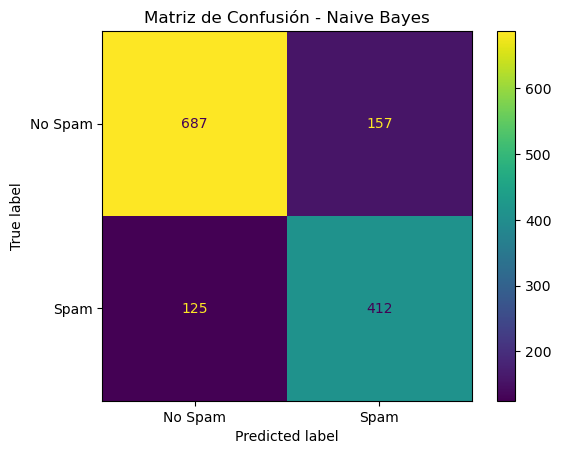

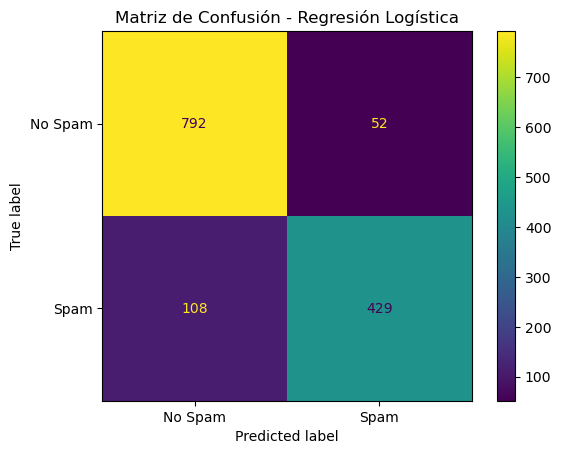

In [178]:
# Para Naive Bayes
y_pred_nb = nb_clf.predict(X_test)  # Reemplazar X_test por X_test_scaled si fue escalado para LR
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=["No Spam", "Spam"])
disp_nb.plot()
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()

# Para Regresión Logística
y_pred_logreg = logreg.predict(X_test_scaled) # Asumiendo que se escaló para LR
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=["No Spam", "Spam"])
disp_logreg.plot()
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

### Análisis de los Errores en Cada Modelo

**Matriz de Confusión - Naive Bayes:**

|          | Pred. No Spam | Pred. Spam |
|----------|---------------|------------|
| No Spam  | 687 (VN)      | 157 (FP)   |
| Spam     | 125 (FN)      | 412 (VP)   |

- **Verdadero Negativo (VN):** 687  
- **Falso Positivo (FP):** 157  
- **Falso Negativo (FN):** 125  
- **Verdadero Positivo (VP):** 412  

---

**Matriz de Confusión - Regresión Logística:**

|          | Pred. No Spam | Pred. Spam |
|----------|---------------|------------|
| No Spam  | 792 (VN)      | 52 (FP)    |
| Spam     | 108 (FN)      | 429 (VP)   |

- **Verdadero Negativo (VN):** 792  
- **Falso Positivo (FP):** 52  
- **Falso Negativo (FN):** 108  
- **Verdadero Positivo (VP):** 429  

---

### ¿Qué tipo de error comete más cada modelo?

1. **Naive Bayes:**
   - **Falsos Positivos (FP):** 157  
     Naive Bayes clasifica incorrectamente más correos legítimos como Spam.  
   - **Falsos Negativos (FN):** 125  
     También comete errores dejando pasar correos Spam como No Spam.

2. **Regresión Logística:**
   - **Falsos Positivos (FP):** 52  
     La Regresión Logística tiene un número significativamente menor de falsos positivos en comparación con Naive Bayes.  
   - **Falsos Negativos (FN):** 108  
     Aunque comete falsos negativos, estos son menos que los falsos positivos de Naive Bayes.

---

### ¿Cuál de los dos tipos de error es más importante?

En el contexto del **filtrado de correos Spam**:

- **Falsos Positivos (FP):**  
  Un correo legítimo clasificado como Spam significa que el usuario podría **perder información importante**. Este es el error más crítico en este problema, ya que afecta directamente la experiencia del usuario al ocultar correos válidos.

- **Falsos Negativos (FN):**  
  Un correo Spam clasificado como No Spam implica que el usuario recibirá correos no deseados en su bandeja de entrada. Si bien esto es molesto, es menos grave que perder un correo importante.

---

### Conclusión

- El modelo de **Regresión Logística** es claramente superior porque:  
   - Tiene muchos menos **Falsos Positivos** (52 vs. 157) que Naive Bayes, reduciendo el riesgo de perder correos legítimos.  
   - Aunque tiene **Falsos Negativos** (108), estos son comparables o incluso menores en magnitud a los de Naive Bayes (125).  

Por lo tanto, la **Regresión Logística** es el modelo preferido, ya que minimiza el error más crítico (los Falsos Positivos) y ofrece un mejor equilibrio en la detección de correos Spam y la preservación de correos legítimos.


# Punto 6

### Cálculo de Precisión y Recuperación

A partir de las matrices de confusión:

**Naive Bayes**  
- Verdadero Positivo (VP) = 412  
- Falso Positivo (FP) = 157  
- Falso Negativo (FN) = 125  
- Verdadero Negativo (VN) = 687  

**Regresión Logística**  
- Verdadero Positivo (VP) = 429  
- Falso Positivo (FP) = 52  
- Falso Negativo (FN) = 108  
- Verdadero Negativo (VN) = 792  

---

### Fórmulas:

$$
\text{Precisión} = \frac{VP}{VP + FP} \quad,\quad \text{Recuperación} = \frac{VP}{VP + FN}
$$

---

### Cálculos:

**Naive Bayes:**
- **Precisión:**
$$
\frac{412}{412 + 157} = \frac{412}{569} \approx 0.724
$$

- **Recuperación:**
$$
\frac{412}{412 + 125} = \frac{412}{537} \approx 0.767
$$

**Regresión Logística:**
- **Precisión:**
$$
\frac{429}{429 + 52} = \frac{429}{481} \approx 0.892
$$

- **Recuperación:**
$$
\frac{429}{429 + 108} = \frac{429}{537} \approx 0.799
$$

---

### Análisis de las Métricas:

1. **Precisión (Minimización de Falsos Positivos):**  
   - La Regresión Logística tiene una precisión **mucho mayor** (0.892) en comparación con Naive Bayes (0.724).  
   - Esto significa que, cuando la Regresión Logística predice que un correo es **Spam**, es mucho más probable que acierte, reduciendo significativamente los **Falsos Positivos** (FP).  

2. **Recuperación (Minimización de Falsos Negativos):**  
   - La Regresión Logística también supera a Naive Bayes en recuperación: 0.799 frente a 0.767.  
   - Esto indica que la Regresión Logística detecta una **mayor proporción de correos Spam**, dejando pasar menos **Falsos Negativos** (FN) en comparación con Naive Bayes.

---

### Relación con los Tipos de Errores Analizados

- **Precisión y Falsos Positivos (FP):**  
  La precisión está directamente relacionada con los **Falsos Positivos**. La **Regresión Logística**, al tener solo **52 FP** frente a **157 FP** de Naive Bayes, logra una precisión más alta. Esto es crucial, ya que minimizar los FP evita clasificar correos legítimos como Spam.

- **Recuperación y Falsos Negativos (FN):**  
  La recuperación está relacionada con los **Falsos Negativos**. La **Regresión Logística** tiene menos FN (**108**) comparado con Naive Bayes (**125**), lo que le permite detectar más correos Spam correctamente.

---

### Conclusión:

La **Regresión Logística** es el mejor modelo en ambas métricas:
- **Mayor Precisión (0.892):** Clasifica con mayor confianza los correos Spam, reduciendo los Falsos Positivos.  
- **Mayor Recuperación (0.799):** Detecta una mayor proporción de correos Spam, minimizando los Falsos Negativos.  

Estas métricas confirman que la Regresión Logística ofrece un mejor equilibrio entre evitar **Falsos Positivos** (que implican pérdida de correos legítimos) y reducir **Falsos Negativos** (que permiten que correos Spam lleguen a la bandeja de entrada).


# Punto 7

In [182]:
y_prob_nb = nb_clf.predict_proba(X_test)[:, 1]
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]


In [183]:
# Curva ROC para Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
auc_nb = roc_auc_score(y_test, y_prob_nb)

# Curva ROC para Regresión Logística
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
auc_logreg = roc_auc_score(y_test, y_prob_logreg)


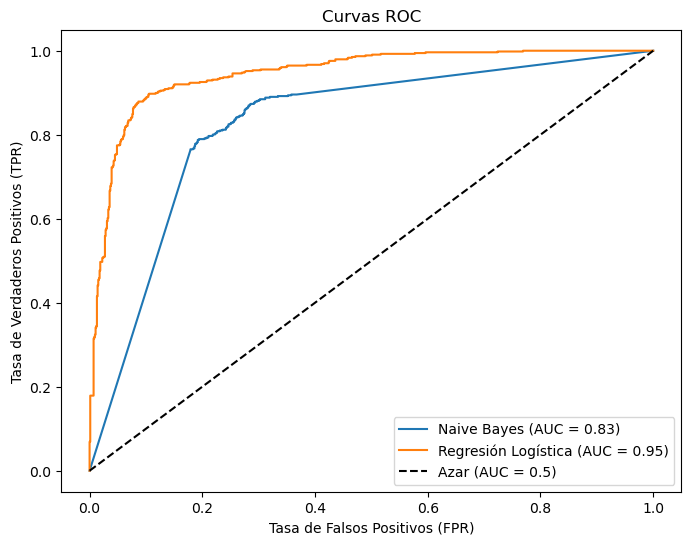

In [184]:
plt.figure(figsize=(8,6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_logreg, tpr_logreg, label=f'Regresión Logística (AUC = {auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Azar (AUC = 0.5)')

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.show()
